In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import tensorflow as tf
import importlib
import matplotlib.pyplot as plt
import os
import glob
import skimage
from skimage import measure
from skimage import filters
from skimage.morphology import remove_small_objects
from skimage.filters import threshold_otsu
from skimage.exposure import rescale_intensity
from tifffile import imread
import scipy
from skimage import img_as_uint
from scipy import ndimage
from Normalize import Path,normalizeMinMax, fill_label_holes, save_tiff_imagej_compatible

/Users/aimachine/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
basedir = '/Users/aimachine/Documents/JuliaData/StardistResults/'
targetdir = '/Users/aimachine/Documents/JuliaData/StardistResults/'

In [6]:
Path = os.path.join(basedir, '*.tif')
X = []
Names = []
filesRaw = glob.glob(Path)
maxtime = 0
axes = 'TYX'
for fname in filesRaw:
      x = imread(fname)
       
      X.append(x)
    
     
      Names.append(fname)
      if X[0].shape[0] > maxtime:
        maxtime = X[0].shape[0]
X.sort
Names.sort


ReshapeX = []
for i in range(len(X)):
    y = np.zeros((maxtime, X[0].shape[1], X[0].shape[2]))
    image = X[i]
    
    y[:X[i].shape[0],:,:] = image[:,:,:]
    ReshapeX.append(y)
    
ReshapeX.sort

print('Total number of input images = ', len(X))
print('Image size = ', X[0].shape)
print('Time dim = ', maxtime)

timerange = maxtime

Total number of input images =  1
Image size =  (73, 512, 512)
Time dim =  73


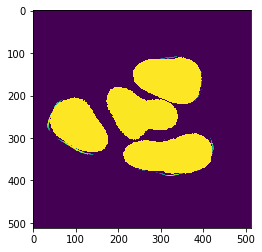

In [7]:
image = ReshapeX[0]
plt.imshow(image[0,:,:])


In [8]:
def RemoveSmallLabel(img):
    labels = img;
    for j in range(timerange):
      smallimg = img[j,:,:]
      
      nonormimg = remove_small_objects(smallimg, min_size=400, connectivity=4, in_place=False)
       
        
      labels [j,:,:] = nonormimg
    return labels

In [9]:
CleanX = []
for i in range(0, len(ReshapeX)):
  img = ReshapeX[i]

  cleanimage = RemoveSmallLabel(img.astype(int))
    
  CleanX.append(cleanimage) 

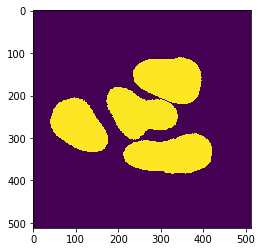

In [10]:
plt.imshow(cleanimage[0,:,:])

In [14]:
for i in range(0, len(CleanX)):
  newimg = CleanX[i]
  
  labelledimage = RemoveSmallLabel(newimg)
  labelledimage = labelledimage.astype(float)  
  save_tiff_imagej_compatible((targetdir + "SmallLabelIgnored" +os.path.basename(Names[i])) , labelledimage, axes)

/Users/aimachine/PyImage/utils/Normalize.py:48: UserWarning: Converting data type from 'float64' to ImageJ-compatible 'float32'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
